<a href="https://colab.research.google.com/github/cashvee/Emotion-recognition/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()  # Select your fer2013.zip file


Saving fer-2013.zip to fer-2013.zip


In [5]:
import os

print(os.listdir())  # See what files are in your current Colab directory


['.config', 'fer-2013.zip', 'sample_data']


In [13]:
import zipfile

with zipfile.ZipFile("fer-2013.zip", 'r') as zip_ref:
    zip_ref.extractall("fer-2013")  # This creates a folder named "fer-2013"

import os
print("Extracted files:", os.listdir("fer-2013"))


Extracted files: ['train', 'test']


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/fer-2013/train"
test_dir = "/content/fer-2013/test"

# Rescale pixel values
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max'
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[checkpoint]
)


Epoch 1/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.8057 - loss: 0.4912

359/359 ━━━━━━━━━━━━━━━━━━━━ 121s 337ms/step - accuracy: 0.8057 - loss: 0.4913 - val_accuracy: 0.5497 - val_loss: 1.9695
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.8218 - loss: 0.4511

359/359 ━━━━━━━━━━━━━━━━━━━━ 119s 331ms/step - accuracy: 0.8217 - loss: 0.4512 - val_accuracy: 0.5536 - val_loss: 1.8623
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.8238 - loss: 0.4419

359/359 ━━━━━━━━━━━━━━━━━━━━ 120s 334ms/step - accuracy: 0.8238 - loss: 0.4419 - val_accuracy: 0.5537 - val_loss: 1.8202
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 119s 331ms/step - accuracy: 0.8332 - loss: 0.4239 - val_accuracy: 0.5283 - val_loss: 2.0284
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8370 - loss: 0.4257

359/359 ━━━━━━━━━━━━━━━━━━━━ 118s 328ms/step - accuracy: 0.8370 - loss: 0.4257 - val_accuracy: 0.5548 - val_loss: 2.1822
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 119s 331ms/step - accuracy: 0.8468 - loss: 0.3898 - val_accuracy: 0.5381 - val_loss: 2.1374
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 118s 328ms/step - accuracy: 0.8493 - loss: 0.3752 - val_accuracy: 0.5454 - val_loss: 2.2408
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.8547 - loss: 0.3733

359/359 ━━━━━━━━━━━━━━━━━━━━ 119s 331ms/step - accuracy: 0.8547 - loss: 0.3733 - val_accuracy: 0.5602 - val_loss: 2.1745
Epoch 9/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 121s 338ms/step - accuracy: 0.8559 - loss: 0.3573 - val_accuracy: 0.5424 - val_loss: 2.4597
Epoch 10/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 124s 344ms/step - accuracy: 0.8751 - loss: 0.3227 - val_accuracy: 0.5424 - val_loss: 2.2358
Epoch 11/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 117s 327ms/step - accuracy: 0.8713 - loss: 0.3197 - val_accuracy: 0.5570 - val_loss: 2.3618
Epoch 12/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 119s 331ms/step - accuracy: 0.8767 - loss: 0.3151 - val_accuracy: 0.5381 - val_loss: 2.5430
Epoch 13/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 120s 333ms/step - accuracy: 0.8752 - loss: 0.3199 - val_accuracy: 0.5173 - val_loss: 2.7795
Epoch 14/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 140s 391ms/step - accuracy: 0.8765 - loss: 0.3175 - val_accuracy: 0.5598 - val_loss: 2.4642
Epoch 15/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 139s 387ms/step - accuracy: 0.8847 - loss

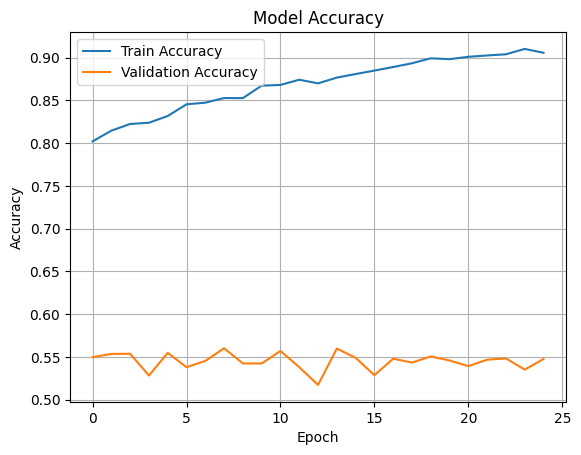

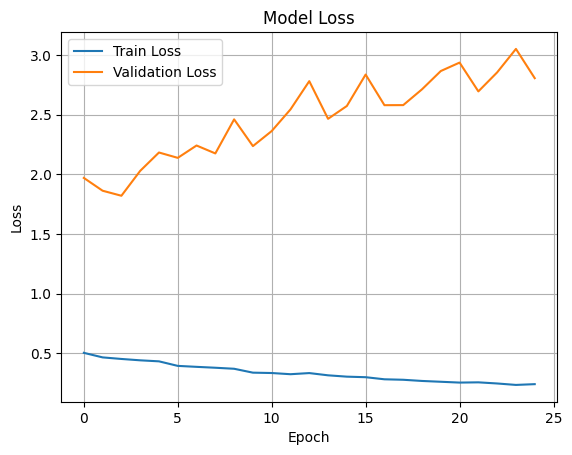

In [28]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [32]:
from google.colab import files
uploaded = files.upload()


Saving face.jpg to face.jpg


In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

img_path = 'face.jpg'  # change to your file name

# Load and convert image
img = image.load_img(img_path, color_mode='grayscale', target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # normalize

# Predict
pred = model.predict(img_array)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[np.argmax(pred)]

print("Predicted Emotion:", predicted_emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Emotion: Surprise


In [18]:
emotion_to_emoji = {
    'Angry': '😠',
    'Disgust': '🤢',
    'Fear': '😨',
    'Happy': '😄',
    'Sad': '😢',
    'Surprise': '😲',
    'Neutral': '😐'
}

emoji_result = emotion_to_emoji.get(predicted_emotion, '❓')
print("Emoji:", emoji_result)


Emoji: 😠
